In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./seoul.csv', encoding='cp949')
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
40216,2019-01-13,108,1.2,-3.0,7.6
40217,2019-01-14,108,1.4,-2.4,5.3
40218,2019-01-15,108,-1.7,-7.2,2.6
40219,2019-01-16,108,-5.2,-10.1,-1.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
날짜         40221 non-null object
지점         40221 non-null int64
평균기온(℃)    39465 non-null float64
최저기온(℃)    39464 non-null float64
최고기온(℃)    39463 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


In [4]:
date = df[df.columns[0]]

years = []
set_years = set()
for d in date:
    if d.split("-")[0] == '1951' or d.split("-")[0] == '1952':
        continue
    if d.split("-")[0] not in set_years:
        set_years.add(d.split("-")[0])
        years.append(d.split("-")[0])

In [5]:
len(years)

111

In [6]:
df.drop([df.columns[1], df.columns[3], df.columns[4]], axis=1, inplace=True)
df

,날짜,평균기온(℃)
0,1907-10-01,13.5
1,1907-10-02,16.2
2,1907-10-03,16.2
3,1907-10-04,16.5
4,1907-10-05,17.6
...,...,...
40216,2019-01-13,1.2
40217,2019-01-14,1.4
40218,2019-01-15,-1.7
40219,2019-01-16,-5.2


In [7]:
date_col = df.columns[0]

for y in years:
    for i, d in enumerate(date):
        if y == d.split('-')[0]:
            df[date_col][i] = y

In [8]:
df.groupby(date_col).mean()

,평균기온(℃)
날짜,
1907,5.103261
1908,10.427322
1909,10.608767
1910,10.412055
1911,10.654795
...,...
2015,13.621918
2016,13.592896
2017,13.073151


In [9]:
mean_temp_not_NaN = df.groupby(date_col).mean()[df.columns[1]].isna() == False
new_df = df.groupby(date_col).mean()[mean_temp_not_NaN]
new_df

,평균기온(℃)
날짜,
1907,5.103261
1908,10.427322
1909,10.608767
1910,10.412055
1911,10.654795
...,...
2015,13.621918
2016,13.592896
2017,13.073151


In [10]:
y = []

for i in new_df:
    y = new_df[i].to_list()

In [11]:
len(y)

111

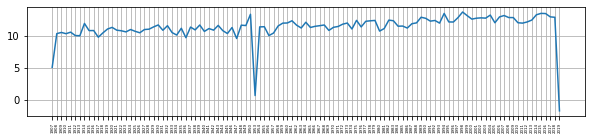

In [12]:
plt.figure(figsize=(10,2))
plt.plot(new_df)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=4)
plt.grid(True)
plt.show()

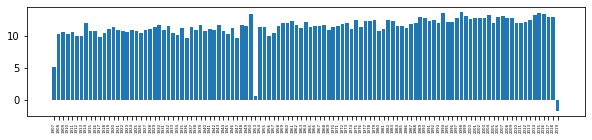

In [13]:
plt.figure(figsize=(10,2))
plt.bar(years, y)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=4)
plt.show()